<b>SUPERVISED MACHINE LEARNING (LINEAR REGRESSION)

The Sparks Foundation

DSBA(DataScience and Business Analytics)

GRIPJUNE21

Task-1: Predict the percentage of an student based on the no. of study hours

Author: Pallavi Mhaiskar

<b>Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<b>Reading the data from the link provided in GRIP Task pd

In [2]:
link= "http://bit.ly/w-data"
s_data=pd.read_csv(link)
print("Data imported Succesfully")

Data imported Succesfully


In [3]:
s_data.head(9)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81


In [4]:
s_data.tail(9)

,Hours,Scores
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
#shape gives the shape of an array

In [7]:
s_data.shape

(25, 2)

In [8]:
#Describe() function shows count, mean, std, minimum, percentiles & maximum

In [9]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
#info() function to get information about the data

In [11]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<b>In the dataset there are 25 students, study hours and marks are already given. we have to predict the percentage of students based on number of hours the student studies.

<b>DATA VISUALIZATION

To plot score distribution

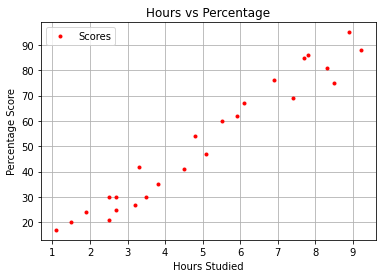

In [13]:
s_data.plot(x='Hours', y='Scores', style='r.')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid(True)
plt.show()

<b>Conclusion= The graph clearly shows positive linear relation between number of hours studied and percentage of score.

PREPARING THE DATA

In [14]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values

<b>Splitting the data using train test split

In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

<b>TRAINING THE ALGORITHM

In [17]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


<b>Plot the test data.

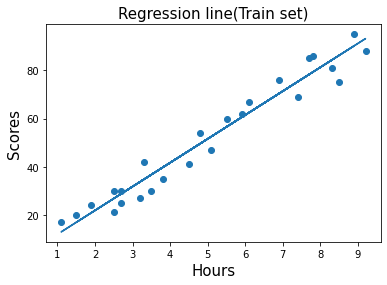

In [18]:
line = regressor.coef_*X+regressor.intercept_


plt.scatter(X, y)
plt.plot(X, line);
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=15)
plt.show()

<b>Calculating the accuracy of model on train dataset

Train set Score
0.9515510725211552


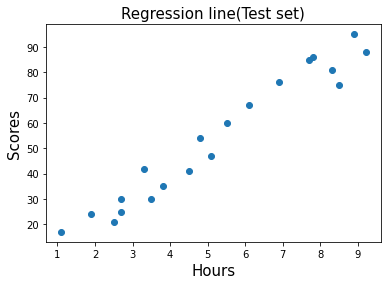

In [19]:
plt.scatter(X_train,y_train)
print("Train set Score")
print(regressor.score(X_train,y_train))
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=15)
plt.show()

<b>Calculating the accuracy of model on Test dataset

Test Score
0.9454906892105354


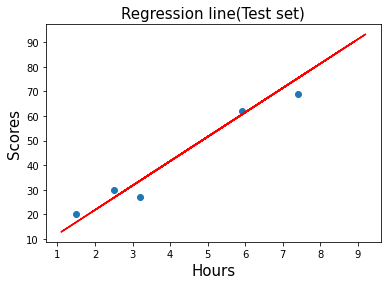

In [20]:
print("Test Score")
print(regressor.score(X_test,y_test))
plt.scatter(X_test,y_test)
plt.plot(X_train,regressor.predict(X_train),color="r")
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=15)
plt.show()

<b>Making Predictions

In [21]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


<b>Compraing actual vs predicted scores

In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<b>Calculating the predicting score of the model

In [23]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


<b>Calculating mean absolute error of the module

In [24]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score:',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
R2 Score: 0.9454906892105354


<b>So, we can conclude that if a student studies 9.25 hours a day his predicted score will be 93.69%

<b>TO SAVE THE MODULE

In [25]:
import joblib
joblib.dump(regressor,"TASK1.pckl")

['TASK1.pckl']

In [26]:
model=joblib.load("TASK1.pckl")